<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

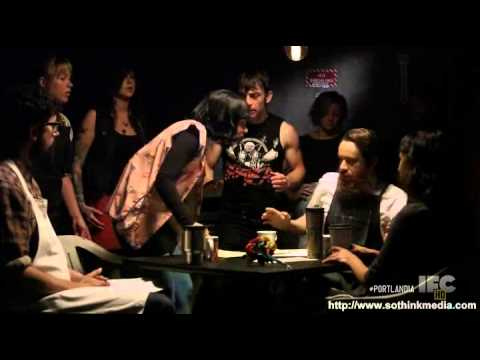

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [6]:
%pwd

'/Users/codyreece/Desktop/Repos/Unit4/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [8]:
# import re library.
import re

# clean the full_review_text column with lambda functions and regex.
#remove date.
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub('\d+\/\d+\/\d+', '', x))
# remove check-in.
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub('^.*?([A-Z])', '\\1', x))
# keep only letters and numbers.
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub(r'[^a-zA-Z ^0-9]', '', x))
# convert  the text to lowercase.
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lower())

# convert star_rating to integer.
shops['star_rating'] = shops['star_rating'].apply(lambda x: int(x[1]))
# show the clean data frame with headers.
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,love love loved the atmosphere every corner of...,5
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austin...,4
2,The Factory - Cafe With a Soul,listed in brunch spots i loved the eclectic an...,4
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2
4,The Factory - Cafe With a Soul,they are located within the northcross mall sh...,4


In [9]:
# import spacy and Tokenizer libraries.
import spacy
from spacy.tokenizer import Tokenizer

# set the nlp with .load on en_core_web_lg.
nlp = spacy.load("en_core_web_lg")
# set the tokenizer with .vocab.
tokenizer = Tokenizer(nlp.vocab)

# set the stop words.
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'im', 'ive', 'place', 'austin', 'come', 'definitely', 'order', 'spot', 'ordered'])

In [24]:
# tokenizer pipeline removing stop words, blank words and lemmatizing.
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    for token in doc:
        if (token.lemma_ not in STOP_WORDS) & (token.text != ' '):
            doc_tokens.append(token.lemma_)

    tokens.append(doc_tokens)
    
# set the new tokens in the data frame.
shops['tokens'] = tokens
# show the data frame tokens.
print(tokens)

cation', 'dreadful', 'isnt', 'fault', 'warn', 'hard'], ['cant', 'vouch', 'tea', 'food', 'meh', 'croque', 'monsieur', 'taste', 'like', 'fancy', 'grill', 'cheese', 'home', 'husband', 'tofu', 'banh', 'mi', 'didnt', 'taste', 'like', 'air', 'bread', 'little', 'sauce', 'ill', 'admit', 'nice', 'veganhealthy', 'option', 'serve', 'brisket', 'meh', 'service', 'meh', 'food', 'high', 'price', 'think', 'worth'], ['time', 'atmosphere', 'cool', 'food', 'feel', 'relax', 'husband', 'know', 'immediate', 'destress', 'effect', 'highly', 'recommend', 'clot', 'cream', 'strawberry', 'jam', 'currant', 'scone', 'stingy', 'flavor', 'profile', 'good', 'thick', 'layer', 'worth', 'extra', 'calory', 'salad', 'dinner', 'favorite', 'tea', 'choice', 'right', 'english', 'caramel', 'honey', 'cream', 'save', 'seat', 'perfection', 'currant', 'scone', 'clot', 'cream', 'butter', 'strawberry', 'jam', 'mmmmmm'], ['list', 'tea', 'tea', 'tea', 'allergyfriendly', 'eat', 'tx', 'little', 'restaurant', 'good', 'tea', 'tea', 'room',

In [11]:
from collections import Counter

# crerating count function.
def count(docs):
       
        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [12]:
# create a data frame for the words count.
wc = count(shops['tokens'])
# show the data frame with headers.
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
129,good,3438,5367,1.0,0.016460,0.016460,0.451418
112,great,2844,3930,2.0,0.012053,0.028512,0.373424
132,like,2266,3361,3.0,0.010308,0.038820,0.297532
444,time,1752,2379,4.0,0.007296,0.046116,0.230042
12,drink,1650,2374,5.0,0.007281,0.053396,0.216649


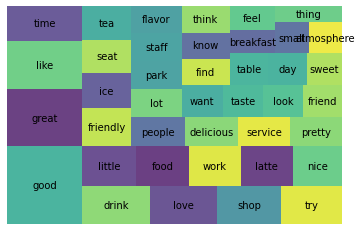

In [23]:
import squarify
import matplotlib.pyplot as plt

# set the top 20 with rank <=40.
wc_top20 = wc[wc['rank'] <= 40]
# plot with squarify.
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
# turn axis off.
plt.axis('off')
# show the plot.
plt.show()

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [14]:
shops.describe()

,star_rating
count,7616.000000
mean,4.169118
std,1.065311
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [15]:
#show the value counts
shops['star_rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating, dtype: int64

In [16]:
# check top words for the higher than a 4 rating.
shops_45 = shops[shops['star_rating'] >= 4]
# # set count on the data.
good_count = count(shops_45['tokens'])
# show the data frame with headers.
good_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
160,good,2726,4230,1.0,0.016659,0.016659,0.443974
112,great,2496,3461,2.0,0.013630,0.030289,0.406515
161,like,1672,2420,3.0,0.009530,0.039819,0.272313
0,love,1604,2117,4.0,0.008337,0.048156,0.261238
19,shop,1349,1813,5.0,0.007140,0.055296,0.219707
352,time,1331,1766,6.0,0.006955,0.062251,0.216775
12,drink,1285,1761,7.0,0.006935,0.069186,0.209283
102,try,1327,1704,8.0,0.006711,0.075897,0.216124
158,little,1250,1554,9.0,0.006120,0.082017,0.203583
31,latte,1031,1538,10.0,0.006057,0.088074,0.167915


In [17]:
# check top words for the lower than3 ratings.
shops_13 = shops[shops['star_rating'] <= 3]
# # set count on the data.
bad_count = count(shops_13['tokens'])
# show the data frame with headers.
bad_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
1,good,712,1137,1.0,0.015759,0.015759,0.482385
4,like,594,941,2.0,0.013043,0.028802,0.402439
11,drink,365,613,3.0,0.008496,0.037298,0.247290
185,time,421,613,4.0,0.008496,0.045795,0.285230
45,food,316,494,5.0,0.006847,0.052642,0.214092
133,great,348,469,6.0,0.006501,0.059142,0.235772
7,service,346,447,7.0,0.006196,0.065338,0.234417
155,shop,315,433,8.0,0.006002,0.071339,0.213415
117,try,338,427,9.0,0.005918,0.077258,0.228997
63,little,312,408,10.0,0.005655,0.082913,0.211382


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [18]:
# bad_counter function.
def bad_counter(w):
    if w in bad_count['word'].values:
      bad_pct = bad_count.loc[bad_count['word'] == w, 'appears_in_pct'].item()
    else:
      bad_pct = 0
    
    return bad_pct
# add a new colomun with bad_counter data.
good_count['bad_appears_in_pct'] = good_count.apply(lambda x: bad_counter(x['word']), axis=1)
# show the dataframe with headers.
good_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct
160,good,2726,4230,1.0,0.016659,0.016659,0.443974,0.482385
112,great,2496,3461,2.0,0.013630,0.030289,0.406515,0.235772
161,like,1672,2420,3.0,0.009530,0.039819,0.272313,0.402439
0,love,1604,2117,4.0,0.008337,0.048156,0.261238,0.142954
19,shop,1349,1813,5.0,0.007140,0.055296,0.219707,0.213415
352,time,1331,1766,6.0,0.006955,0.062251,0.216775,0.285230
12,drink,1285,1761,7.0,0.006935,0.069186,0.209283,0.247290
102,try,1327,1704,8.0,0.006711,0.075897,0.216124,0.228997
158,little,1250,1554,9.0,0.006120,0.082017,0.203583,0.211382
31,latte,1031,1538,10.0,0.006057,0.088074,0.167915,0.155827


In [19]:
# create a new column by remove bad_appears_in_pct from appears_in_pct data.
good_count['appears_in_diff'] = good_count['appears_in_pct'] - good_count['bad_appears_in_pct']
# show the dataframe with headers.
good_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct,appears_in_diff
160,good,2726,4230,1.0,0.016659,0.016659,0.443974,0.482385,-0.038411
112,great,2496,3461,2.0,0.013630,0.030289,0.406515,0.235772,0.170742
161,like,1672,2420,3.0,0.009530,0.039819,0.272313,0.402439,-0.130126
0,love,1604,2117,4.0,0.008337,0.048156,0.261238,0.142954,0.118284
19,shop,1349,1813,5.0,0.007140,0.055296,0.219707,0.213415,0.006292
352,time,1331,1766,6.0,0.006955,0.062251,0.216775,0.285230,-0.068455
12,drink,1285,1761,7.0,0.006935,0.069186,0.209283,0.247290,-0.038007
102,try,1327,1704,8.0,0.006711,0.075897,0.216124,0.228997,-0.012874
158,little,1250,1554,9.0,0.006120,0.082017,0.203583,0.211382,-0.007799
31,latte,1031,1538,10.0,0.006057,0.088074,0.167915,0.155827,0.012089


In [20]:
# top 10 words for good shops.
good_count.sort_values(by=['appears_in_diff'], ascending=False)[:10]


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct,appears_in_diff
112,great,2496,3461,2.0,0.013630,0.030289,0.406515,0.235772,0.170742
553,delicious,1178,1314,15.0,0.005175,0.116142,0.191857,0.056233,0.135624
0,love,1604,2117,4.0,0.008337,0.048156,0.261238,0.142954,0.118284
129,friendly,1420,1487,12.0,0.005856,0.099790,0.231270,0.122629,0.108642
574,amaze,695,798,38.0,0.003143,0.203719,0.113192,0.031165,0.082027
184,perfect,623,699,47.0,0.002753,0.229865,0.101466,0.026423,0.075043
337,favorite,660,775,39.0,0.003052,0.206771,0.107492,0.034553,0.072939
465,awesome,556,619,61.0,0.002438,0.266116,0.090554,0.029133,0.061421
180,super,674,773,40.0,0.003044,0.209816,0.109772,0.066396,0.043376
389,recommend,598,630,59.0,0.002481,0.261241,0.097394,0.054878,0.042516


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

